# Import Packages

In [10]:
import kwant
import math
import cmath
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *

import time


import numpy as np


# For matrix support
import tinyarray

# define Pauli-matrices for convenience
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])
sigma_n = tinyarray.array([[0, 0], [0, 0]])

# Add path

In [11]:
import sys
# insert your own path to modules
sys.path.insert(0, 'path_to_Modules')

# Plot Functions

In [12]:
import PlotFunctions

# Handy Functions

In [13]:
# notebooks with fermi energy of gold in Ry,eV

In [14]:
import HandyFunctions

# Gold - S - Helicene system

In [15]:
import Gold_S_Hel_system

In [16]:
def make_system_gold(nlayers=3, xi_d=0.6,xi_p = 0.006,
                Txz=3,Tyz=3, d_L= 50,
                txz_left_1=1,tyz_left_1=0,
                    txz_left_2=1,tyz_left_2=1,
                    txz_left_3=0,tyz_left_3=1,
                    plot_left = False,
                    txz_right_1=1,tyz_right_1=0, 
                    txz_right_2=1,tyz_right_2=1,
                    txz_right_3=0,tyz_right_3=1,
                    plot_right = False,
                nrings =6 ,tvec=3,E_z=0,r=1.4,zstart=0,b=3.6,
                chirality_left=True,
                u=-8.1,delta_e=-12.6,Es=-6.21):


    system_goldf = Gold_S_Hel_system.make_system(nlayers,xi_d,xi_p, Txz,Tyz, d_L, 
                            txz_left_1,tyz_left_1,
                            txz_left_2,tyz_left_2,
                            txz_left_3,tyz_left_3,
                            plot_left,
                            txz_right_1,tyz_right_1, 
                            txz_right_2,tyz_right_2,
                            txz_right_3,tyz_right_3,
                            plot_right,
                            nrings ,tvec,E_z,r,zstart,b,
                            chirality_left,u,delta_e,Es).finalized()
    
    return system_goldf

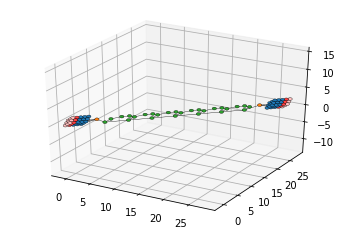

In [17]:
kwant.plot(make_system_gold(),hop_lw=0.1);

# Spin Polarization: $P_z$

## $\xi_d,\xi_p =$ $0.6$  eV, $6$ meV

In [18]:
# chirality_left:
# True = M-helicene
# False = P-helicene

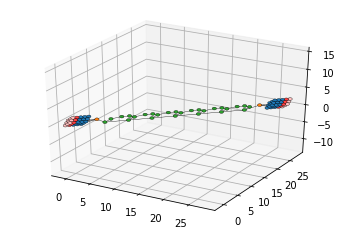

In [32]:
helicene_P = make_system_gold(chirality_left = False
                             )
helicene_M = make_system_gold(chirality_left = True
                             )

kwant.plot(helicene_M,hop_lw=0.1);

In [33]:
ef  = HandyFunctions.fermi_gold_shifted(True) 

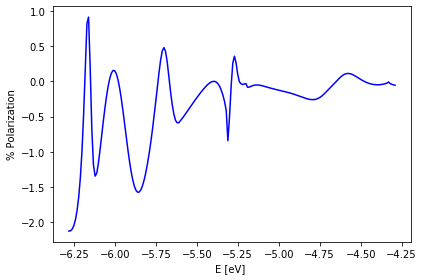

In [34]:
energies,Pol_list_P,Tp_list_P = PlotFunctions.plot_pol(helicene_P,emin=ef-1, emax=ef+1, de=0.01)


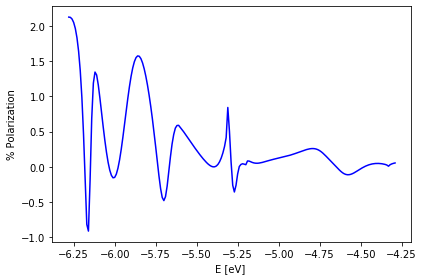

In [35]:
energiesP, Pol_list_M, Tp_list_M = PlotFunctions.plot_pol(helicene_M,  emin = ef-1, emax =ef+1,de=0.01)




# Plot Pretty

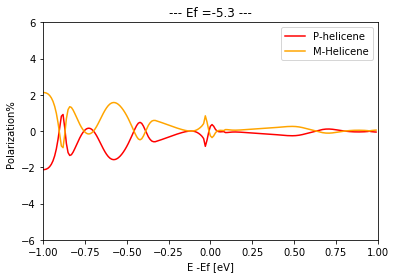

In [36]:

ef = HandyFunctions.fermi_gold_shifted(True)


plt.title('--- Ef ={} ---'.format(np.round(ef,1)))
plt.plot(energiesP - ef
             , 100*np.array(Pol_list_P), color = 'red' ,label = 'P-helicene')
plt.plot(energiesP- ef
             , 100*np.array(Pol_list_M), color = 'orange',label = 'M-Helicene')
# plt.plot(energiesP - ef
#              , 100*(np.array(Pol_list_M)+np.array(Pol_list_P)), color = 'green',label = 'sum')

    
plt.xlabel("E -Ef [eV]")
plt.ylabel("Polarization%  ")
plt.xlim(-1,1)
plt.ylim(-6,6)
plt.legend(loc='upper right')


plt.show()

In [36]:
# file = open("Pol_list_P{}_.txt".format(6),'w')
# np.savetxt(file,Pol_list_P )
# file.close()

# file = open("Pol_list_M{}_.txt".format(6),'w')
# np.savetxt(file,Pol_list_M )
# file.close()

# file = open("energiesP{}_.txt".format(6),'w')
# np.savetxt(file,energiesP )
# file.close()



## $\xi_d,\xi_p =$ $0.6$  eV, $6$ meV,  $n_{rings}$ =12

In [22]:
# chirality_left:
# True = M-helicene
# False = P-helicene

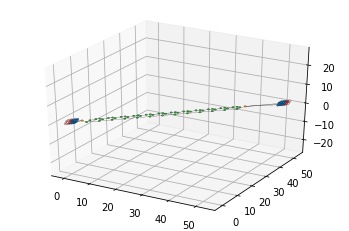

In [27]:
helicene_P12 = make_system_gold(chirality_left = False,nrings=12,d_L=100)
helicene_M12 = make_system_gold(chirality_left = True,nrings=12,d_L=100)

kwant.plot(helicene_P12,hop_lw=0.1);

In [28]:
ef  = HandyFunctions.fermi_gold_shifted(True) 

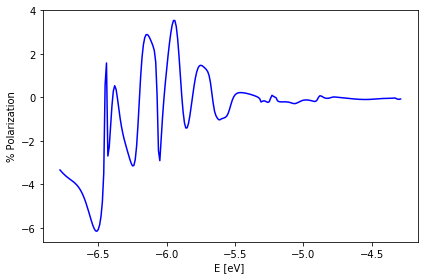

In [29]:
energies,Pol_list_P12,Tp_list_P12 = PlotFunctions.plot_pol(helicene_P12,emin=ef-1.5, emax=ef+1, de=0.01)


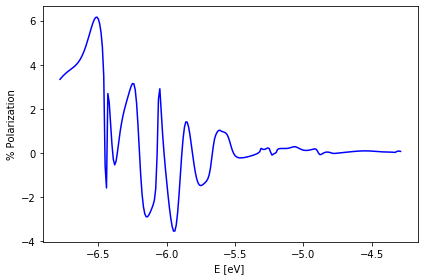

In [30]:
energiesP, Pol_list_M12, Tp_list_M12 = PlotFunctions.plot_pol(helicene_M12,  emin = ef-1.5, emax =ef+1,de=0.01)




# Plot Pretty

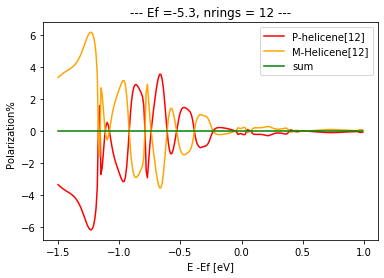

In [31]:

ef = HandyFunctions.fermi_gold_shifted(True)


plt.title('--- Ef ={}, nrings = {} ---'.format(np.round(ef,1),12))
plt.plot(energiesP - ef
             , 100*np.array(Pol_list_P12), color = 'red' ,label = 'P-helicene[12]')
plt.plot(energiesP- ef
             , 100*np.array(Pol_list_M12), color = 'orange',label = 'M-Helicene[12]')
plt.plot(energiesP - ef
             , 100*(np.array(Pol_list_M12)+np.array(Pol_list_P12)), color = 'green',label = 'sum')

    
plt.xlabel("E -Ef [eV]")
plt.ylabel("Polarization%  ")
# plt.xlim(-1,1)
# plt.ylim(-10,10)
plt.legend(loc='upper right')


plt.show()

In [58]:
# file = open("Pol_list_P{}_.txt".format(12),'w')
# np.savetxt(file,Pol_list_P12 )
# file.close()

# file = open("Pol_list_M{}_.txt".format(12),'w')
# np.savetxt(file,Pol_list_M12 )
# file.close()

# file = open("energiesP{}_.txt".format(12),'w')
# np.savetxt(file,energiesP )
# file.close()

## Load Values $[6]$Helicene

In [11]:
# pol_P6_load = np.loadtxt("Pol_list_P6_.txt")
# pol_M6_load = np.loadtxt("Pol_list_M6_.txt")
# energies_load6 = np.loadtxt("energiesP6_.txt")

## Load Values $[12]$Helicene

In [12]:
# pol_P12_load = np.loadtxt("Pol_list_P12_.txt")
# pol_M12_load = np.loadtxt("Pol_list_M12_.txt")
# energies_load12 = np.loadtxt("energiesP12_.txt")

# Opposite sign

In [ ]:
ef = HandyFunctions.fermi_gold_shifted(True) 
# plt.title('--- Ef ={}, nrings = {} ---'.format(np.round(ef,1),6))
plt.plot(energies_load6 - ef
             , 100*np.array(pol_P6_load), color = 'red' ,label = '[6]P-helicene')
plt.plot(energies_load6- ef
             , 100*np.array(pol_M6_load), color = 'orange',label = '[6]M-Helicene')

# plt.plot(energiesP - ef
#              , 100*(np.array(pol_M6_load)+np.array(pol_P6_load)), color = 'green',label = 'sum')

    
plt.xlabel("$E - Ef$ [eV]")
plt.ylabel("Spin Polarization%  ")
plt.xlim(-1,1)
plt.ylim(-6,6)
plt.legend(loc='upper right')



plt.show()

## Length increase $\rightarrow$ SP increaces

In [ ]:
ef = HandyFunctions.fermi_gold_shifted(True) 

plt.plot(energies_load6- ef
             , 100*np.array(pol_P6_load), color = 'red',label = '[6]P-Helicene')
plt.plot(energies_load12 - ef
             , 100*np.array(pol_P12_load), color = 'green' ,label = '[12]P-helicene')



    
plt.xlabel("$E - Ef$ [eV]")

plt.ylabel("Spin Polarization%  ")
plt.xlim(-1,1)
plt.ylim(-6,6)
plt.legend(loc='upper right')


plt.show()